In [1]:
from google.colab import files
uploaded = files.upload()

Saving superstore.xls to superstore.xls


In [2]:
import pandas as pd
import numpy as np
import io
df = pd.read_excel(io.BytesIO(uploaded['superstore.xls']))
df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   datetime64[ns]
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9994 non-null   int64         
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-null   object        
 15  Sub-Category  9994 non-null   object  

RowID           0
OrderID         0
OrderDate       0
ShipDate        0
ShipMode        0
CustomerID      0
CustomerName    0
Segment         0
Country         0
City            0
State           0
PostalCode      0
Region          0
ProductID       0
Category        0
Sub-Category    0
ProductName     0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
df.CustomerID = df.CustomerID.astype('category')

In [5]:
df.to_csv('Superstore_cleaned.csv', index = False)

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
colors = sns.color_palette()

In [7]:
data = pd.read_csv('Superstore_cleaned.csv')
data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         9994 non-null   int64  
 1   OrderID       9994 non-null   object 
 2   OrderDate     9994 non-null   object 
 3   ShipDate      9994 non-null   object 
 4   ShipMode      9994 non-null   object 
 5   CustomerID    9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  PostalCode    9994 non-null   int64  
 12  Region        9994 non-null   object 
 13  ProductID     9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  ProductName   9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

In [9]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'],infer_datetime_format=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   object        
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9994 non-null   int64         
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-null   object        
 15  Sub-Category  9994 non-null   object  

In [10]:
data.insert(4,'Year',data.OrderDate.dt.year)
data.insert(5,'Month',data.OrderDate.dt.month)
data.head()

,RowID,OrderID,OrderDate,ShipDate,Year,Month,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,2016,11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,2016,11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,2016,6,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,2015,10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,2015,10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
data.groupby('CustomerID')['OrderDate'].transform(np.min)

0      2015-10-15
1      2015-10-15
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2014-03-01
9991   2014-03-01
9992   2014-03-01
9993   2014-09-09
Name: OrderDate, Length: 9994, dtype: datetime64[ns]

In [12]:
Start_Year = data.groupby('CustomerID')['OrderDate'].transform(np.min).dt.year
Start_Year

0       2015
1       2015
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2014
9991    2014
9992    2014
9993    2014
Name: OrderDate, Length: 9994, dtype: int64

In [13]:
Start_Month = data.groupby('CustomerID')['OrderDate'].transform(np.min).dt.month
Start_Month

0       10
1       10
2        6
3       10
4       10
        ..
9989     1
9990     3
9991     3
9992     3
9993     9
Name: OrderDate, Length: 9994, dtype: int64

In [14]:
data.insert(6,'Start_Year',Start_Year)
data.insert(7,'Start_Month',Start_Month)
data.tail()

,RowID,OrderID,OrderDate,ShipDate,Year,Month,Start_Year,Start_Month,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,2014,1,2014,1,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,2017,2,2014,3,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,2017,2,2014,3,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,2017,2,2014,3,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,2017,5,2014,9,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [15]:
Month_Passed = (data.Year - data.Start_Year)*12 + (data.Month - data.Start_Month)
Month_Passed

0       13
1       13
2        0
3        0
4        0
        ..
9989     0
9990    35
9991    35
9992    35
9993    32
Length: 9994, dtype: int64

In [16]:
data.insert(8,'Month_Passed', Month_Passed)
data.tail()

,RowID,OrderID,OrderDate,ShipDate,Year,Month,Start_Year,Start_Month,Month_Passed,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,2014,1,2014,1,0,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,2017,2,2014,3,35,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,2017,2,2014,3,35,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,2017,2,2014,3,35,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,2017,5,2014,9,32,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [17]:
def make_month(month):
  if month < 10:
    return '0' + str(month)
  return str(month)

In [18]:
data.Start_Month.apply(make_month)

0       10
1       10
2       06
3       10
4       10
        ..
9989    01
9990    03
9991    03
9992    03
9993    09
Name: Start_Month, Length: 9994, dtype: object

In [19]:
Start_ym = data.Start_Year.astype(str) + data.Start_Month.apply(make_month)

In [20]:
data.insert(9,'Start_ym',Start_ym)
data.head(1)

,RowID,OrderID,OrderDate,ShipDate,Year,Month,Start_Year,Start_Month,Month_Passed,Start_ym,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,2016,11,2015,10,13,201510,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [21]:
data.groupby(['Start_ym','Month_Passed']).first()

RowID         OrderID  ... Discount   Profit
Start_ym Month_Passed                         ...                  
201401   0               593  CA-2014-135405  ...      0.2   1.1680
         1              1518  CA-2014-111059  ...      0.2  27.2480
         3              1405  US-2014-118486  ...      0.2  -2.1896
         4              1658  CA-2014-127159  ...      0.0  10.7849
         6              3885  CA-2014-152849  ...      0.2   0.3822
...                      ...             ...  ...      ...      ...
201707   0              1304  US-2017-126179  ...      0.0   5.5177
         5              2463  CA-2017-148691  ...      0.2  29.3720
201709   0              6756  CA-2017-124205  ...      0.0  18.9600
201710   0               527  CA-2017-113558  ...      0.2  42.7470
201711   0              1653  US-2017-132444  ...      0.0  45.8136

[894 rows x 25 columns]

In [22]:
def get_unique_id(x):
  return np.unique(x)

In [23]:
data.groupby(['Start_ym','Month_Passed'])['CustomerID'].apply(get_unique_id)

Start_ym  Month_Passed
201401    0               [AJ-10780, BD-11605, BS-11590, CA-11965, CS-12...
          1                                  [CS-12250, DL-13315, TB-21400]
          3                                            [SD-20485, SV-20365]
          4                                            [EH-13990, HL-15040]
          6                                            [DW-13195, JO-15145]
                                                ...                        
201707    0                                            [CS-12460, JC-15385]
          5                                                      [CS-12460]
201709    0                                                      [TC-21145]
201710    0                                            [JR-15700, PH-18790]
201711    0                                                      [CD-12280]
Name: CustomerID, Length: 894, dtype: object

In [24]:
def get_unique_len_id(x):
  return len(np.unique(x))

In [25]:
data.groupby(['Start_ym','Month_Passed'])['CustomerID'].apply(get_unique_len_id)

Start_ym  Month_Passed
201401    0               32
          1                3
          3                2
          4                2
          6                2
                          ..
201707    0                2
          5                1
201709    0                1
201710    0                2
201711    0                1
Name: CustomerID, Length: 894, dtype: int64

In [26]:
cohort_df = data.groupby(['Start_ym','Month_Passed'])['CustomerID'].apply(get_unique_len_id).reset_index()
cohort_df

,Start_ym,Month_Passed,CustomerID
0,201401,0,32
1,201401,1,3
2,201401,3,2
3,201401,4,2
4,201401,6,2
...,...,...,...
889,201707,0,2
890,201707,5,1
891,201709,0,1
892,201710,0,2


In [27]:
cohort_df = cohort_df.pivot(index = 'Start_ym', columns = 'Month_Passed', values = 'CustomerID')
cohort_df

Month_Passed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
Start_ym,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201401,32.0,3.0,NaN,2.0,2.0,NaN,2.0,4.0,5.0,3.0,7.0,5.0,3.0,NaN,3.0,3.0,3.0,4.0,3.0,2.0,4.0,NaN,6.0,5.0,2.0,1.0,5.0,4.0,3.0,5.0,1.0,1.0,11.0,2.0,9.0,6.0,5.0,1.0,6.0,4.0,5.0,4.0,1.0,2.0,9.0,9.0,10.0,6.0
201402,24.0,4.0,2.0,1.0,NaN,2.0,2.0,3.0,3.0,4.0,4.0,1.0,NaN,2.0,2.0,2.0,2.0,3.0,NaN,6.0,2.0,3.0,2.0,NaN,3.0,1.0,1.0,4.0,NaN,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,5.0,3.0,3.0,4.0,6.0,6.0,3.0,NaN
201403,65.0,4.0,2.0,8.0,7.0,NaN,7.0,5.0,8.0,6.0,1.0,2.0,6.0,3.0,5.0,5.0,3.0,5.0,9.0,11.0,13.0,12.0,4.0,4.0,6.0,8.0,8.0,6.0,9.0,5.0,13.0,8.0,13.0,10.0,2.0,6.0,6.0,12.0,13.0,10.0,12.0,6.0,19.0,8.0,18.0,16.0,NaN,NaN
201404,56.0,6.0,2.0,4.0,3.0,8.0,6.0,9.0,8.0,1.0,4.0,5.0,8.0,10.0,6.0,5.0,6.0,9.0,3.0,14.0,11.0,3.0,2.0,7.0,5.0,8.0,9.0,8.0,5.0,14.0,6.0,14.0,15.0,4.0,3.0,14.0,3.0,11.0,5.0,7.0,8.0,15.0,8.0,14.0,14.0,NaN,NaN,NaN
201405,56.0,5.0,5.0,4.0,10.0,2.0,12.0,10.0,4.0,3.0,4.0,7.0,2.0,5.0,2.0,5.0,8.0,6.0,11.0,8.0,5.0,2.0,3.0,7.0,7.0,5.0,5.0,4.0,11.0,8.0,13.0,13.0,4.0,3.0,3.0,5.0,4.0,11.0,7.0,6.0,16.0,7.0,17.0,9.0,NaN,NaN,NaN,NaN
201406,48.0,1.0,2.0,4.0,2.0,9.0,8.0,1.0,4.0,6.0,5.0,5.0,3.0,4.0,7.0,5.0,7.0,16.0,9.0,3.0,2.0,9.0,5.0,4.0,5.0,4.0,2.0,11.0,10.0,7.0,14.0,3.0,3.0,4.0,6.0,9.0,9.0,5.0,3.0,13.0,7.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
201407,44.0,6.0,5.0,NaN,5.0,8.0,2.0,NaN,8.0,2.0,7.0,7.0,5.0,NaN,5.0,4.0,6.0,7.0,2.0,2.0,4.0,5.0,6.0,6.0,4.0,9.0,7.0,6.0,11.0,10.0,3.0,7.0,4.0,6.0,7.0,9.0,4.0,6.0,11.0,10.0,13.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
201408,49.0,8.0,3.0,11.0,5.0,3.0,4.0,2.0,4.0,3.0,5.0,6.0,2.0,9.0,6.0,8.0,13.0,2.0,1.0,4.0,3.0,7.0,6.0,7.0,9.0,15.0,5.0,11.0,11.0,2.0,4.0,3.0,8.0,7.0,7.0,9.0,8.0,9.0,12.0,11.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201409,68.0,9.0,9.0,11.0,1.0,2.0,9.0,10.0,9.0,2.0,6.0,8.0,12.0,6.0,13.0,15.0,2.0,5.0,9.0,5.0,9.0,8.0,7.0,4.0,12.0,3.0,15.0,13.0,3.0,2.0,9.0,9.0,8.0,11.0,13.0,9.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
cohort_df = round(cohort_df.div(cohort_df.iloc[:,0],axis = 0),4)*100
cohort_df

Month_Passed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
Start_ym,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201401,100.0,9.38,NaN,6.25,6.25,NaN,6.25,12.50,15.62,9.38,21.88,15.62,9.38,NaN,9.38,9.38,9.38,12.50,9.38,6.25,12.50,NaN,18.75,15.62,6.25,3.12,15.62,12.50,9.38,15.62,3.12,3.12,34.38,6.25,28.12,18.75,15.62,3.12,18.75,12.50,15.62,12.50,3.12,6.25,28.12,28.12,31.25,18.75
201402,100.0,16.67,8.33,4.17,NaN,8.33,8.33,12.50,12.50,16.67,16.67,4.17,NaN,8.33,8.33,8.33,8.33,12.50,NaN,25.00,8.33,12.50,8.33,NaN,12.50,4.17,4.17,16.67,NaN,12.50,16.67,16.67,16.67,16.67,16.67,16.67,12.50,16.67,8.33,8.33,20.83,12.50,12.50,16.67,25.00,25.00,12.50,NaN
201403,100.0,6.15,3.08,12.31,10.77,NaN,10.77,7.69,12.31,9.23,1.54,3.08,9.23,4.62,7.69,7.69,4.62,7.69,13.85,16.92,20.00,18.46,6.15,6.15,9.23,12.31,12.31,9.23,13.85,7.69,20.00,12.31,20.00,15.38,3.08,9.23,9.23,18.46,20.00,15.38,18.46,9.23,29.23,12.31,27.69,24.62,NaN,NaN
201404,100.0,10.71,3.57,7.14,5.36,14.29,10.71,16.07,14.29,1.79,7.14,8.93,14.29,17.86,10.71,8.93,10.71,16.07,5.36,25.00,19.64,5.36,3.57,12.50,8.93,14.29,16.07,14.29,8.93,25.00,10.71,25.00,26.79,7.14,5.36,25.00,5.36,19.64,8.93,12.50,14.29,26.79,14.29,25.00,25.00,NaN,NaN,NaN
201405,100.0,8.93,8.93,7.14,17.86,3.57,21.43,17.86,7.14,5.36,7.14,12.50,3.57,8.93,3.57,8.93,14.29,10.71,19.64,14.29,8.93,3.57,5.36,12.50,12.50,8.93,8.93,7.14,19.64,14.29,23.21,23.21,7.14,5.36,5.36,8.93,7.14,19.64,12.50,10.71,28.57,12.50,30.36,16.07,NaN,NaN,NaN,NaN
201406,100.0,2.08,4.17,8.33,4.17,18.75,16.67,2.08,8.33,12.50,10.42,10.42,6.25,8.33,14.58,10.42,14.58,33.33,18.75,6.25,4.17,18.75,10.42,8.33,10.42,8.33,4.17,22.92,20.83,14.58,29.17,6.25,6.25,8.33,12.50,18.75,18.75,10.42,6.25,27.08,14.58,29.17,22.92,NaN,NaN,NaN,NaN,NaN
201407,100.0,13.64,11.36,NaN,11.36,18.18,4.55,NaN,18.18,4.55,15.91,15.91,11.36,NaN,11.36,9.09,13.64,15.91,4.55,4.55,9.09,11.36,13.64,13.64,9.09,20.45,15.91,13.64,25.00,22.73,6.82,15.91,9.09,13.64,15.91,20.45,9.09,13.64,25.00,22.73,29.55,20.45,NaN,NaN,NaN,NaN,NaN,NaN
201408,100.0,16.33,6.12,22.45,10.20,6.12,8.16,4.08,8.16,6.12,10.20,12.24,4.08,18.37,12.24,16.33,26.53,4.08,2.04,8.16,6.12,14.29,12.24,14.29,18.37,30.61,10.20,22.45,22.45,4.08,8.16,6.12,16.33,14.29,14.29,18.37,16.33,18.37,24.49,22.45,20.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201409,100.0,13.24,13.24,16.18,1.47,2.94,13.24,14.71,13.24,2.94,8.82,11.76,17.65,8.82,19.12,22.06,2.94,7.35,13.24,7.35,13.24,11.76,10.29,5.88,17.65,4.41,22.06,19.12,4.41,2.94,13.24,13.24,11.76,16.18,19.12,13.24,22.06,14.71,23.53,17.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


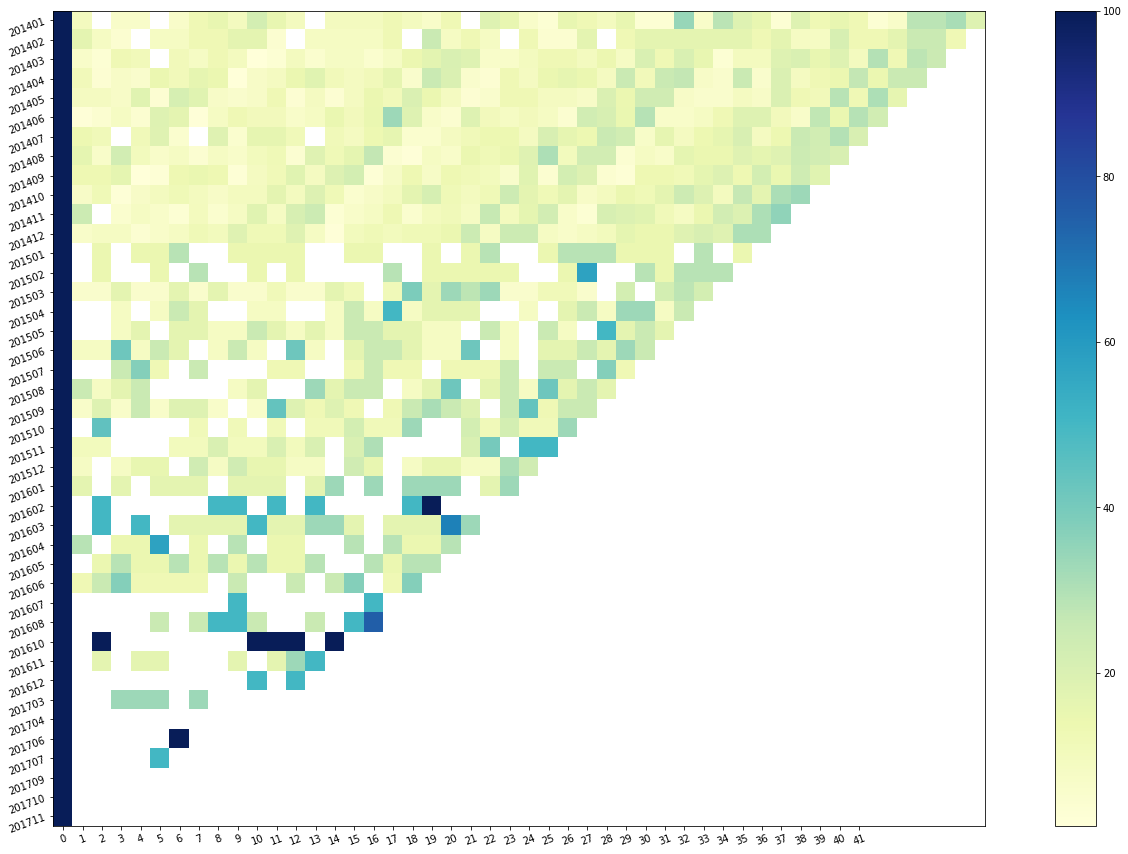

In [29]:
#dataviz = sns.load_dataset("cohort_df")
#dataviz = dataviz.pivot("month", "year", "passengers")

plt.figure(figsize = (25, 15))
plt.imshow(cohort_df, cmap = 'YlGnBu')
plt.xticks(range(len(cohort_df)), cohort_df.columns, rotation = 20)
plt.yticks(range(len(cohort_df)), cohort_df.index, rotation = 20)
plt.colorbar()
plt.show()
            

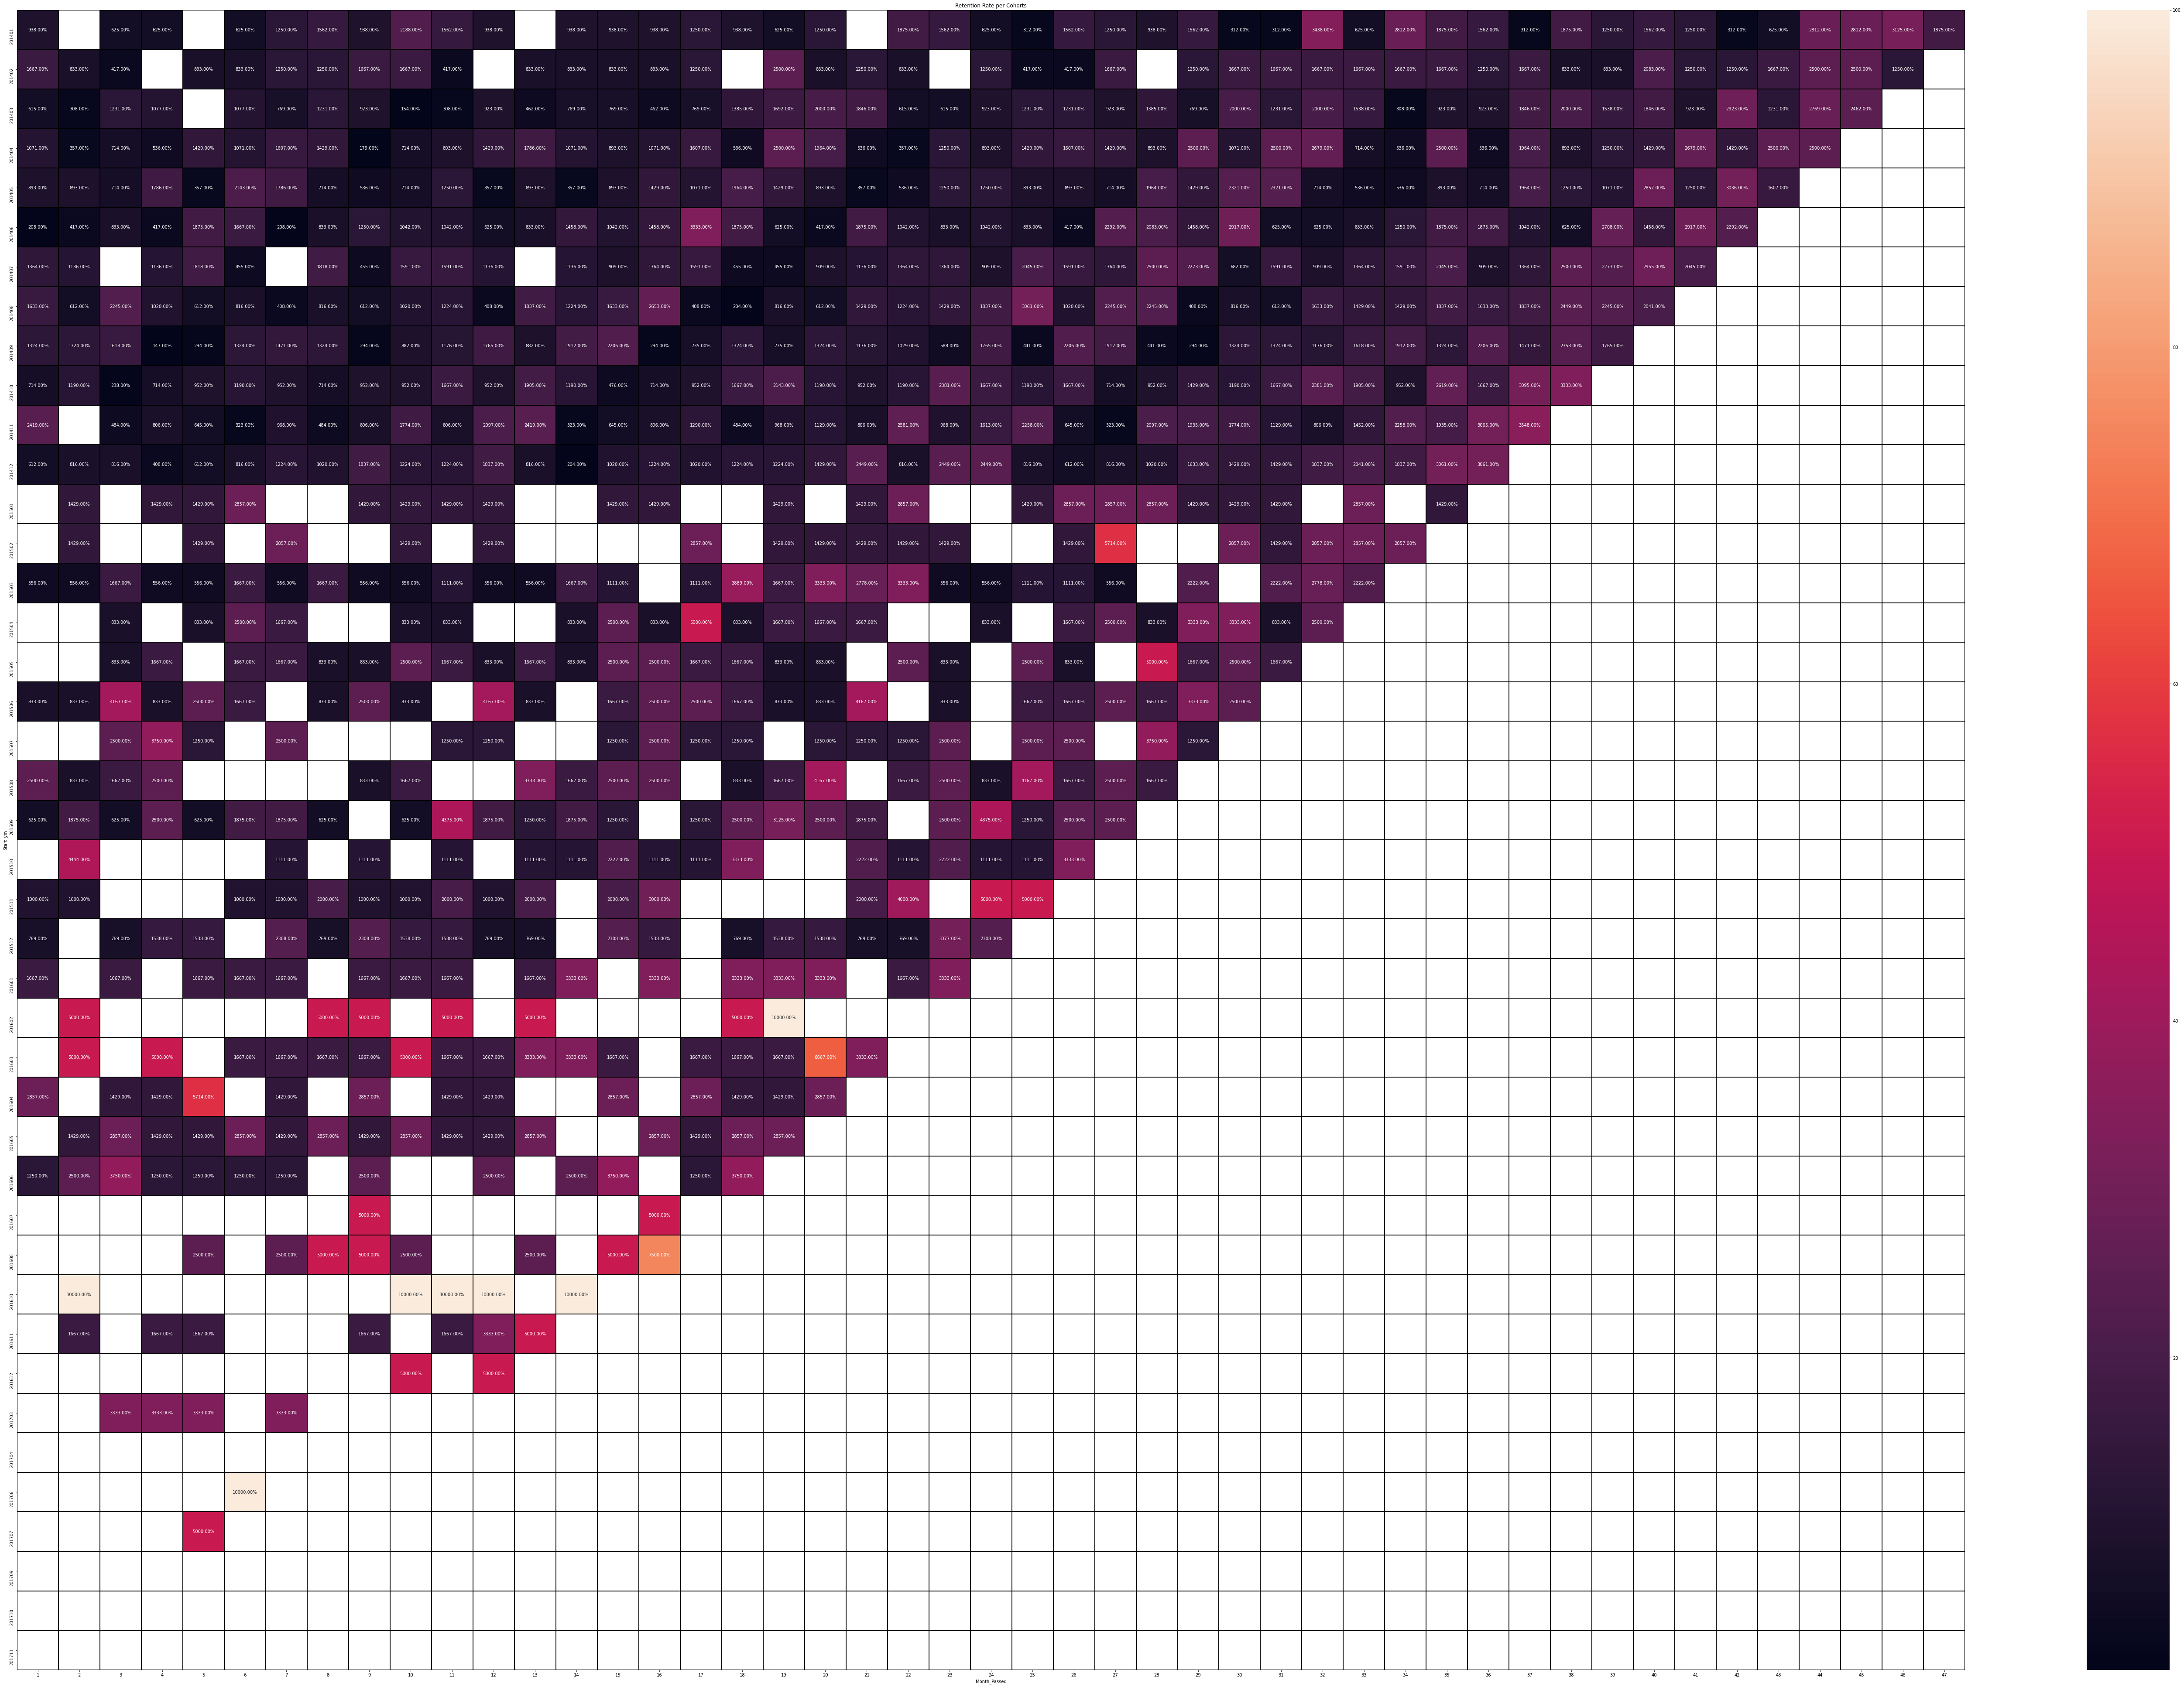

In [30]:
plt.figure(figsize=(100, 70))
plt.title('Retention Rate per Cohorts')
cohort_df = round(cohort_df.div(cohort_df.iloc[:,0],axis = 0),4)*100
sns.heatmap(cohort_df.iloc[:, 1:], annot=True, 
            fmt='.2%', linewidths=1, linecolor='black'); 

In [33]:
from matplotlib import font_manager, rc
def make_heatmap_label(df, month, freq):
    if month is True:
        labels = ["{}M+".format(freq) + str(i) for i in df.index]
    else:
        labels = ["{}W+".format(freq // 7) + str(i) for i in df.index]

    return labels
x_label = make_heatmap_label(cohort_df, month=month, freq=freq)
plt.title("Cohort Analysis : {}".format("Retention Rate(정기배송)"))
sns.set(font_scale=1.1)
sns.heatmap(user_retention.T,
            cmap="PuBu",
            xticklabels=x_label,
            mask=make_masks(cohort_df, cohort_df),
            annot=True,
            fmt='.2%')
plt.xticks(rotation=0)
plt.yticks(va="center", rotation=0)
plt.show()

NameError: ignored